In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso

from IPython.display import display, HTML

css = """
.output {
    flex-direction: column;
}
"""

HTML('<style>{}</style>'.format(css))
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 170)
import warnings
warnings.filterwarnings('ignore')

/kaggle/input/concrete-data/Concrete_Data.csv


In [2]:
df = pd.read_csv("/kaggle/input/concrete-data/Concrete_Data.csv")
def check_df(dataframe, head=5):
    print ("SHAPE".center(80, "~"))
    print(dataframe.shape)
    print("TYPES".center(80, "~"))
    print(dataframe.dtypes)
    print("HEAD".center(80, "~"))
    display(dataframe.head(head))
    print("TAIL".center(80, "~"))
    display(dataframe.tail(head))
    print("UNIQUENESS".center(80, "~"))
    print(dataframe.nunique())
    print("NA".center(80, "~"))
    print(dataframe.isnull().sum())
    print("DESCRIBE".center(80, "`"))
    display(dataframe.describe().T)
    print("\n\n\n")
check_df(df)

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~SHAPE~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
(1030, 9)
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TYPES~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~HEAD~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~TAIL~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77
1029,260.9,100.5,78.3,200.6,8.6,864.5,761.5,28,32.40


~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~UNIQUENESS~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cement (component 1)(kg in a m^3 mixture)                278
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    185
Fly Ash (component 3)(kg in a m^3 mixture)               156
Water  (component 4)(kg in a m^3 mixture)                195
Superplasticizer (component 5)(kg in a m^3 mixture)      111
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     284
Fine Aggregate (component 7)(kg in a m^3 mixture)        302
Age (day)                                                 14
Concrete compressive strength(MPa, megapascals)          845
dtype: int64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~NA~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m

,count,mean,std,min,25%,50%,75%,max
Cement (component 1)(kg in a m^3 mixture),1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
Blast Furnace Slag (component 2)(kg in a m^3 mixture),1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
Fly Ash (component 3)(kg in a m^3 mixture),1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
Water (component 4)(kg in a m^3 mixture),1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
Superplasticizer (component 5)(kg in a m^3 mixture),1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
Coarse Aggregate (component 6)(kg in a m^3 mixture),1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
Fine Aggregate (component 7)(kg in a m^3 mixture),1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
Age (day),1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
"Concrete compressive strength(MPa, megapascals)",1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


The column names are too long, so I renamed all of them but for some reason,3 of them didn't change

In [3]:
df.rename(columns={"Cement (component 1)(kg in a m^3 mixture)": "Cement",
                   "Blast Furnace Slag (component 2)(kg in a m^3 mixture)": "Blast_FS",
                   "Fly Ash (component 3)(kg in a m^3 mixture)": "Ash",
                   "Water (component 4)(kg in a m^3 mixture)": "Water_",
                   "Superplasticizer (component 5)(kg in a m^3 mixture)": "Superplasticizer",
                   "Coarse Aggregate (component 6)(kg in a m^3 mixture)": "Coarse_Agg",
                   "Fine Aggregate (component 7)(kg in a m^3 mixture)": "Fine Agg",
                   "Age (day)": "Age",
                   "Concrete compressive strength(MPa, megapascals)": "Concrete_cs"}, inplace=True)

In [4]:
df.columns

Index(['Cement', 'Blast_FS', 'Ash', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Agg',
       'Age', 'Concrete compressive strength(MPa, megapascals) '],
      dtype='object')

In [5]:
df.duplicated().sum()

25

duplicates bias your fitted model, therefore  lead to the model overfitting

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
num_cols = [col for col in df.columns if df[col].dtypes != "O"]
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")
#scan them all
for col in num_cols:
    target_summary_with_num(df, "Concrete compressive strength(MPa, megapascals) ", col)

                                                  Cement
Concrete compressive strength(MPa, megapascals)         
2.33                                               108.3
3.32                                               122.6
4.57                                               102.0
4.78                                               153.0
4.83                                               141.3
...                                                  ...
79.40                                              389.9
79.99                                              540.0
80.20                                              323.7
81.75                                              315.0
82.60                                              389.9

[845 rows x 1 columns]


                                                  Blast_FS
Concrete compressive strength(MPa, megapascals)           
2.33                                                 162.4
3.32                                                 183

pariplot visuallize the correcaltions between features and target. As seen,the correlation is not good enough but just to be sure, let's check the heatmap

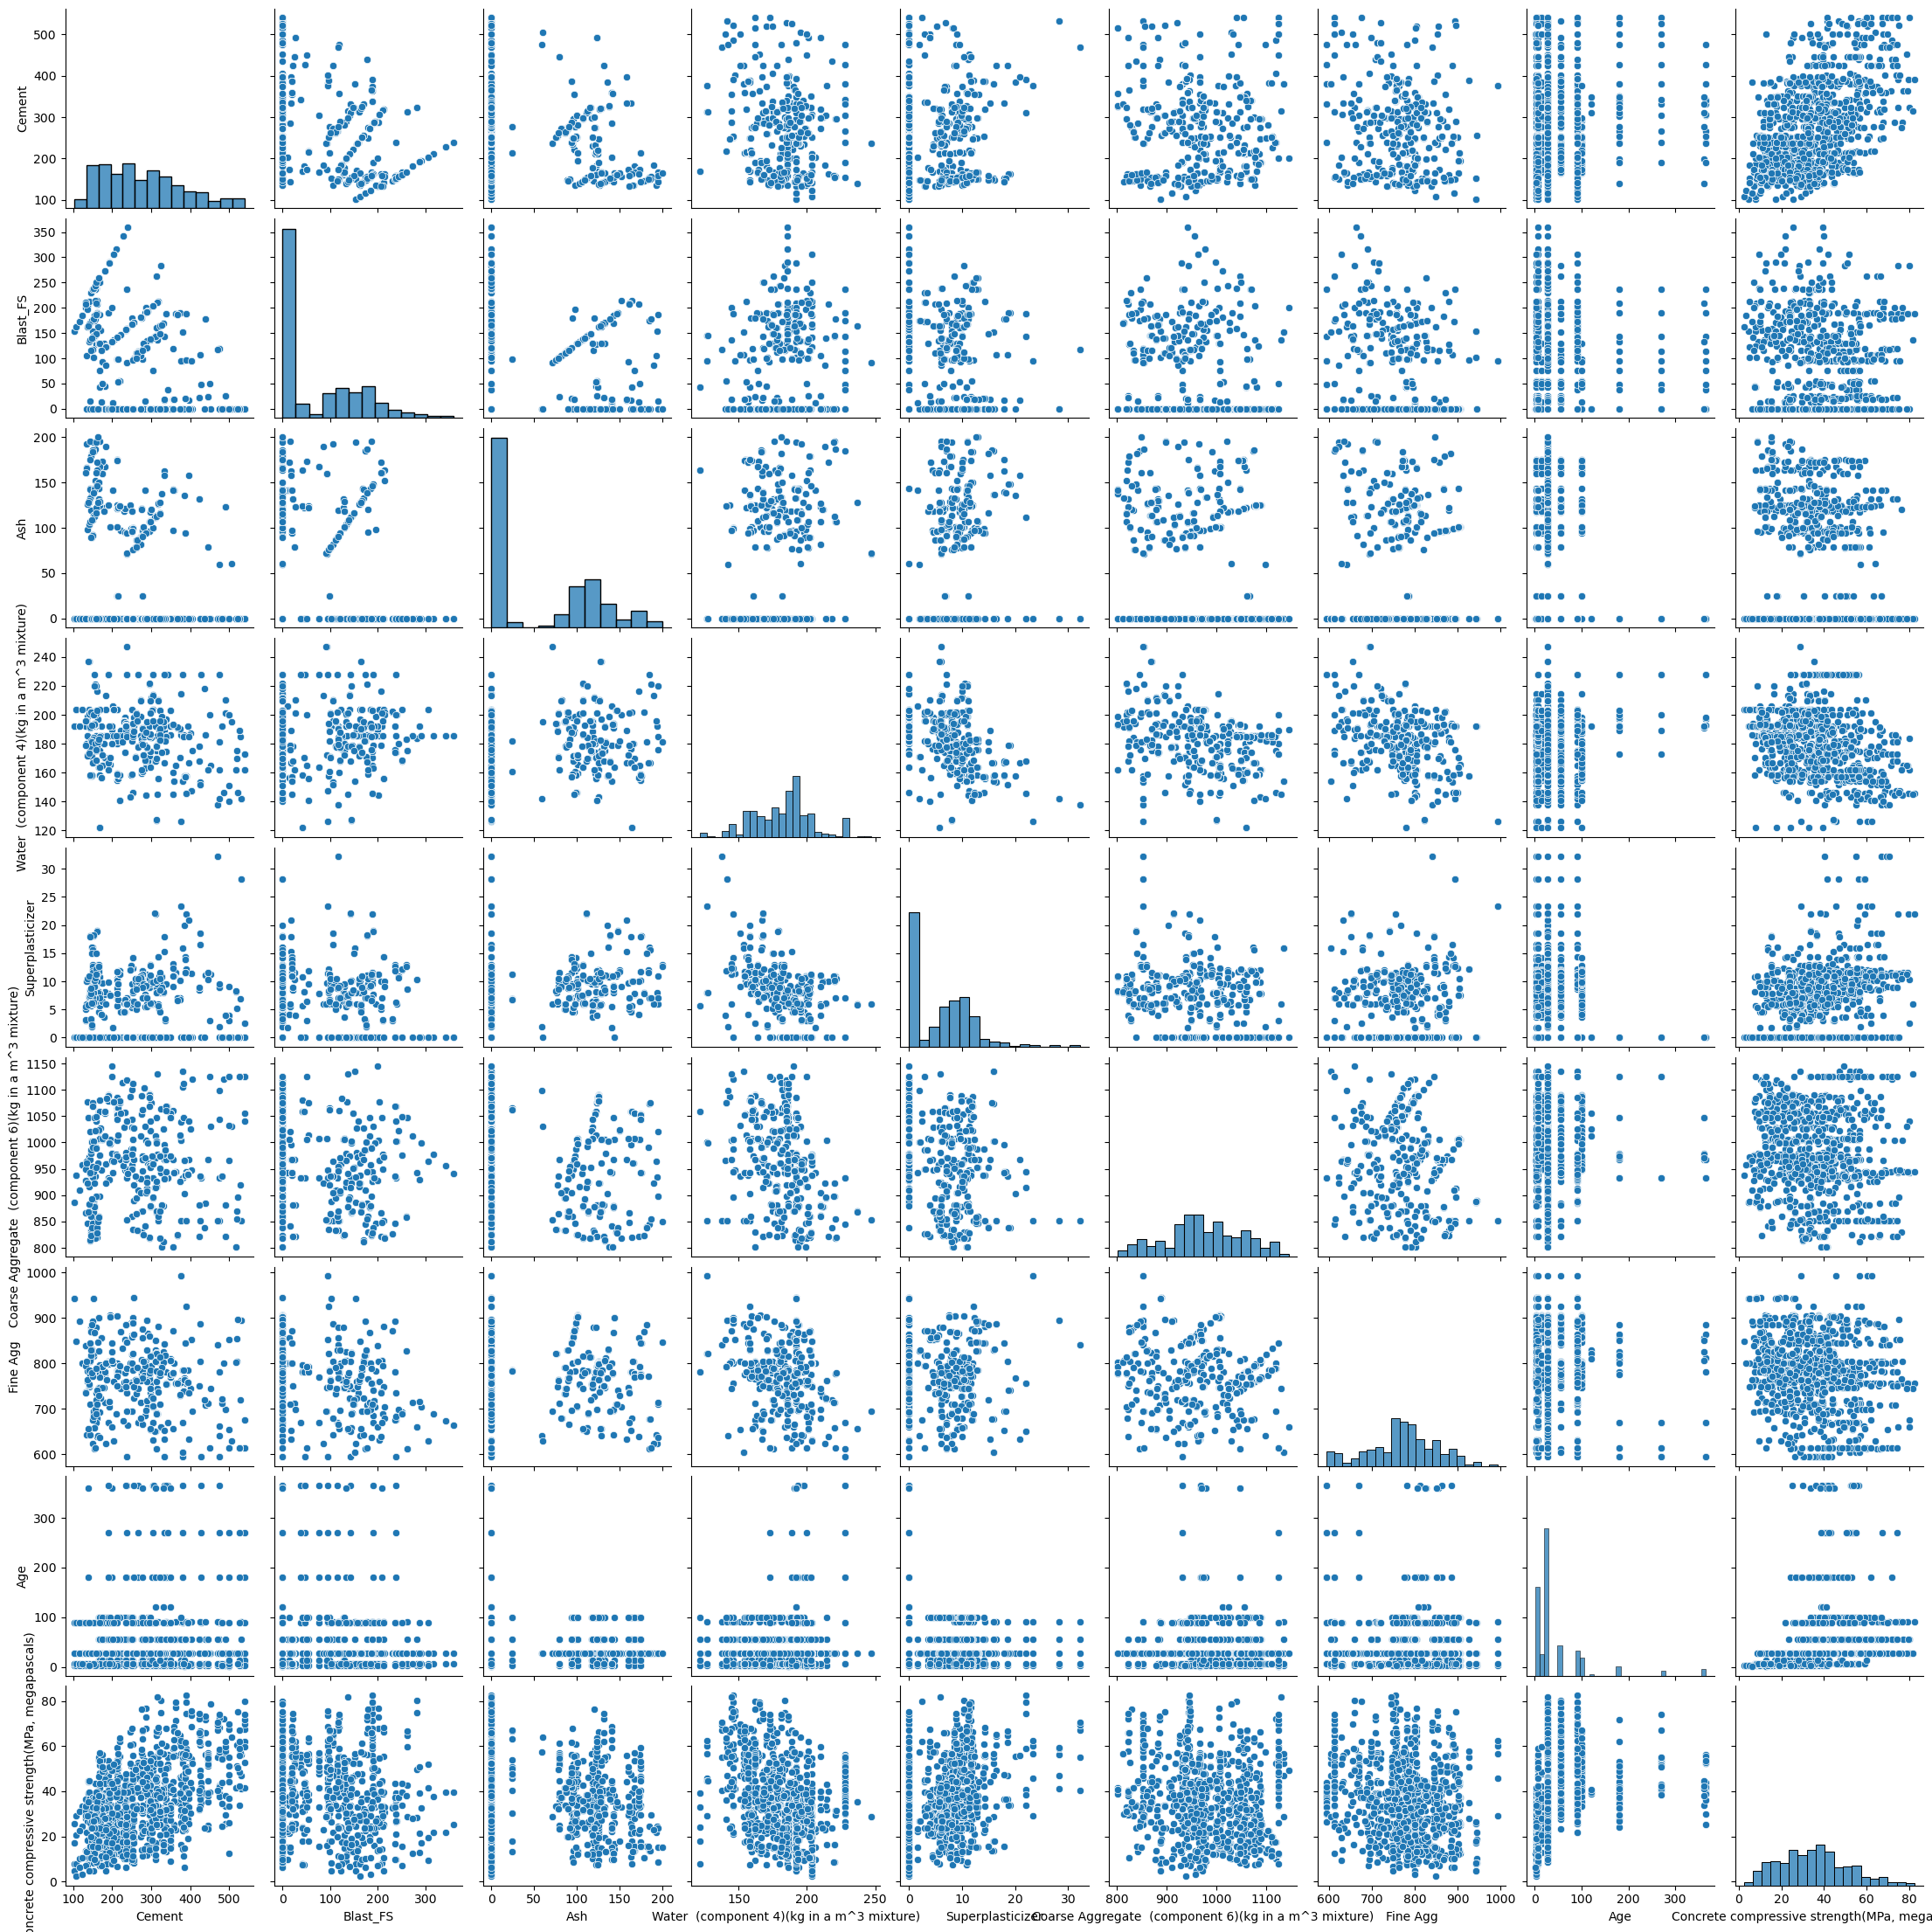

In [8]:
sns.pairplot(df)

Cement is the most correlated one with the Target

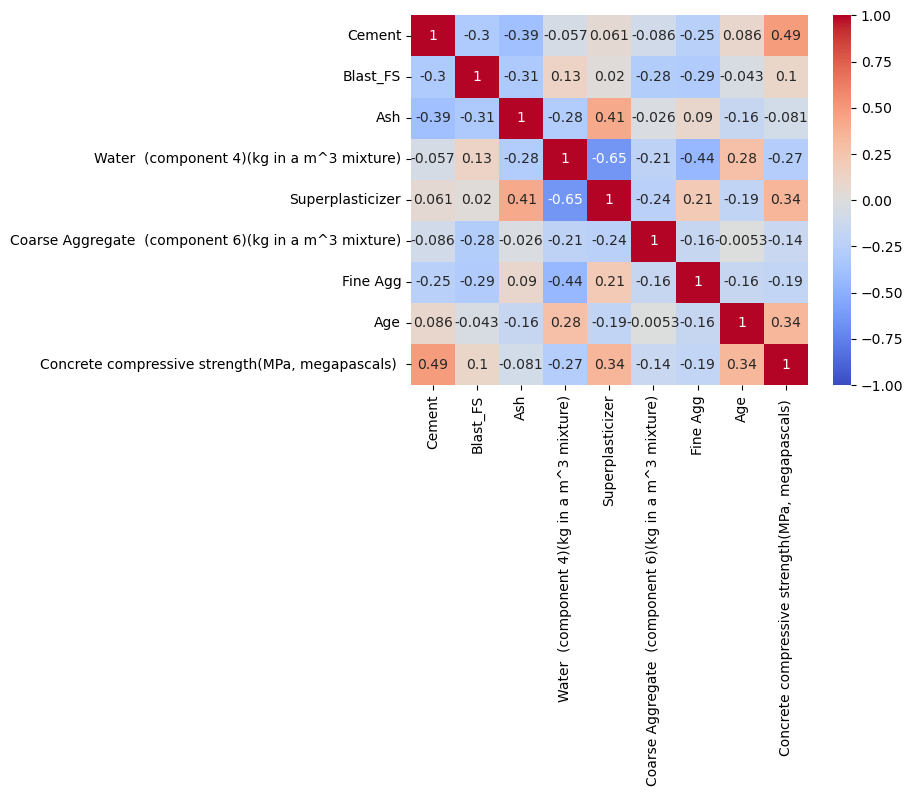

In [9]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap="coolwarm");

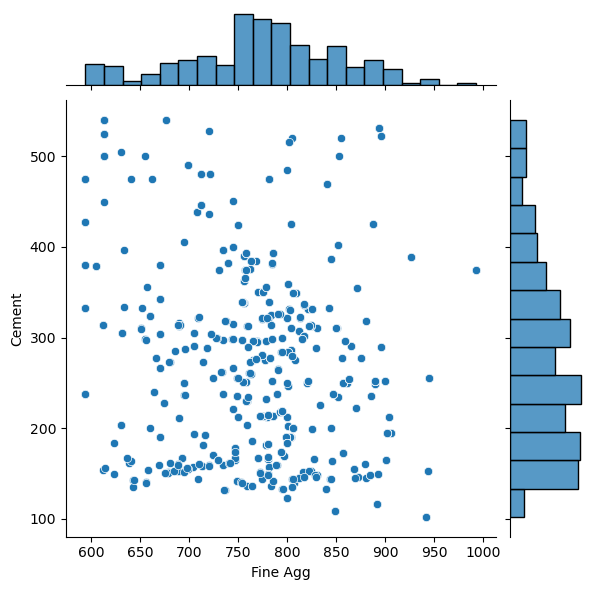

In [10]:
sns.jointplot(data=df,x="Fine Agg", y="Cement")

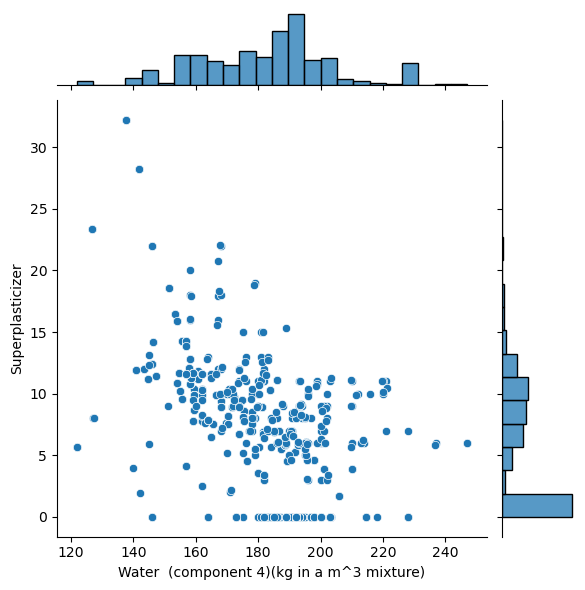

In [11]:
sns.jointplot(data=df,x="Water  (component 4)(kg in a m^3 mixture)", y="Superplasticizer")

pivot table is an interractive way of visualising all the features

In [12]:
!pip install pivottablejs
from pivottablejs import pivot_ui
pivot_ui(df)

# Preprocessing

let's prepare the data to ML regression algorithms (Ridge, Lasso,Linear )

In [13]:
X = df.drop('Concrete compressive strength(MPa, megapascals) ',axis=1)
y= df['Concrete compressive strength(MPa, megapascals) ']

split the data to 2

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

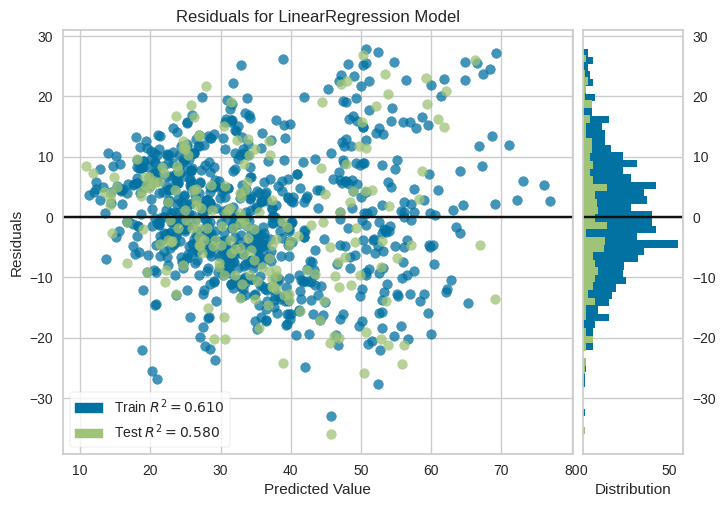

<Axes: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [15]:
from yellowbrick.regressor import ResidualsPlot

model = LinearRegression()
visualizer = ResidualsPlot(model, hist=True, qqplot=False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()# Finalize and render the figure

# LINEAR REGRESSION 
# without scaling

In [16]:
lr = LinearRegression()
lr.fit(X_train, y_train)
pd.DataFrame(lr.coef_, index=X.columns, columns=["coef"])

,coef
Cement,0.116667
Blast_FS,0.098066
Ash,0.084585
Water (component 4)(kg in a m^3 mixture),-0.131391
Superplasticizer,0.331480
Coarse Aggregate (component 6)(kg in a m^3 mixture),0.015522
Fine Agg,0.020649
Age,0.110642


In [17]:
Train_score = round(lr.score(X_train,y_train), 2)
Train_score

0.61

In [18]:
Test_Score = round(lr.score(X_test,y_test), 2)
Test_Score

0.58

# with scaling

In [19]:
scaler = StandardScaler()
X_train_z = scaler.fit_transform(X_train)
X_test_z = scaler.transform(X_test)

In [20]:
lr.fit(X_train_z, y_train)
pd.DataFrame(lr.coef_, index=X.columns, columns=["coef"])

,coef
Cement,12.118761
Blast_FS,8.437272
Ash,5.439505
Water (component 4)(kg in a m^3 mixture),-2.827854
Superplasticizer,1.970793
Coarse Aggregate (component 6)(kg in a m^3 mixture),1.198983
Fine Agg,1.669945
Age,6.894504


In [21]:
Train_score = round(lr.score(X_train_z,y_train), 2)
Train_score

0.61

In [22]:
Test_Score = round(lr.score(X_test_z,y_test), 2)
Test_Score

0.58

# cross validation

In [23]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [24]:
from sklearn.pipeline import Pipeline

ops = [("scaler", StandardScaler()), ("lr", LinearRegression())]
pipe_lr = Pipeline(steps=ops)

scores = cross_validate(pipe_lr,
                        X_train,
                        y_train,
                        cv=10,
                        scoring=[
                            "r2", "neg_mean_absolute_error",
                            "neg_mean_squared_error",
                            "neg_root_mean_squared_error"
                        ],
                        return_train_score=True)

<Axes: >

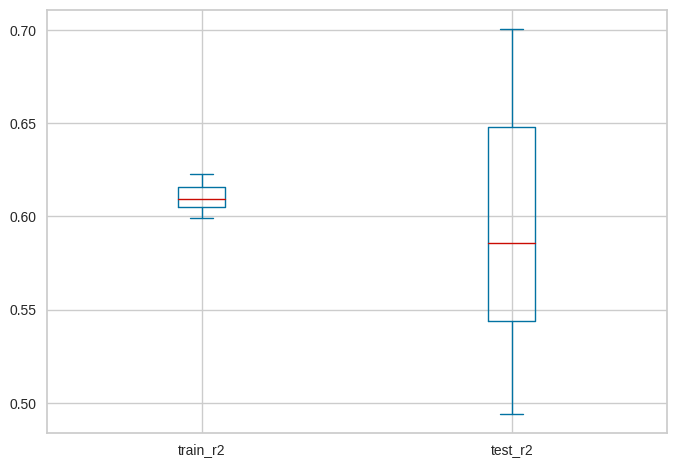

In [25]:
pd.DataFrame(scores).loc[:,["train_r2", "test_r2"]].plot(kind="box")

In [26]:
pd.DataFrame(scores).iloc[:,2:].mean()

test_r2                                0.589167
train_r2                               0.610493
test_neg_mean_absolute_error          -8.061542
train_neg_mean_absolute_error         -7.953688
test_neg_mean_squared_error         -103.501618
train_neg_mean_squared_error         -99.853232
test_neg_root_mean_squared_error     -10.133467
train_neg_root_mean_squared_error     -9.992138
dtype: float64

# Ridge Regression

In [27]:
ridge_model = Ridge(alpha=1)   # Lambda
ridge_model.fit(X_train_z, y_train)
ridge_model.coef_

array([11.90967337,  8.22897378,  5.25557453, -2.97151629,  1.96945079,
        1.05559367,  1.48095891,  6.87396373])

In [28]:
Ridge_train_score = ridge_model.score(X_train_z,y_train).round(2)   # Alpha = 1
Ridge_train_score

0.61

In [29]:
Ridge_test_score = ridge_model.score(X_test_z, y_test).round(2)
Ridge_test_score

0.58

In [30]:
rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X_train_z, y_train)
rr100.coef_

array([ 7.03003949,  3.52772654,  1.07237524, -4.47869771,  2.69361145,
       -1.31842348, -1.88485179,  5.74074818])

In [31]:
Ridge_train_score100 = rr100.score(X_train_z,y_train).round(2)   # Alpha = 100
Ridge_train_score100

0.59

In [32]:
Ridge_test_score100 = rr100.score(X_test_z, y_test).round(2)
Ridge_test_score100

0.55

In [33]:
print("linear regression train score:", Train_score)
print("linear regression test score:", Test_Score)
print ("ridge regression train score low alpha:", Ridge_train_score)
print ("ridge regression test score low alpha:", Ridge_test_score)
print ("ridge regression train score high alpha:", Ridge_train_score100)
print ("ridge regression test score high alpha:", Ridge_test_score100)

linear regression train score: 0.61
linear regression test score: 0.58
ridge regression train score low alpha: 0.61
ridge regression test score low alpha: 0.58
ridge regression train score high alpha: 0.59
ridge regression test score high alpha: 0.55


# GridsearchCV

In [34]:
alpha_space = np.linspace(0.01, 100, 1000)
param_grid = {"ridge__alpha": alpha_space}

ops = [("scaler", StandardScaler()), ("ridge", Ridge())]
model = Pipeline(steps=ops)

grid_ridge = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=5,
                          verbose=2,
                          n_jobs=-1,
                          return_train_score=True)

grid_ridge.fit(X_train, y_train)


Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[CV] END ..................................ridge__alpha=0.01; total time=   0.0s
[CV] END ..................................ridge__alpha=0.01; total time=   0.0s
[CV] END ..................................ridge__alpha=0.01; total time=   0.0s
[CV] END ...................ridge__alpha=0.11009009009009008; total time=   0.0s
[CV] END ...................ridge__alpha=0.11009009009009008; total time=   0.0s
[CV] END ...................ridge__alpha=0.11009009009009008; total time=   0.0s
[CV] END ...................ridge__alpha=0.11009009009009008; total time=   0.0s
[CV] END ...................ridge__alpha=0.11009009009009008; total time=   0.0s
[CV] END ...................ridge__alpha=0.21018018018018017; total time=   0.0s
[CV] END ...................ridge__alpha=0.21018018018018017; total time=   0.0s
[CV] END ...................ridge__alpha=0.21018018018018017; total time=   0.0s
[CV] END ...................ridge__alpha=0.2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'ridge__alpha': array([1.00000000e-02, 1.10090090e-01, 2.10180180e-01, 3.10270270e-01,
       4.10360360e-01, 5.10450450e-01, 6.10540541e-01, 7.10630631e-01,
       8.10720721e-01, 9.10810811e-01, 1.01090090e+00, 1.11099099e+00,
       1.21108108e+00, 1.31117117e+00, 1.41...
       9.80982883e+01, 9.81983784e+01, 9.82984685e+01, 9.83985586e+01,
       9.84986486e+01, 9.85987387e+01, 9.86988288e+01, 9.87989189e+01,
       9.88990090e+01, 9.89990991e+01, 9.90991892e+01, 9.91992793e+01,
       9.92993694e+01, 9.93994595e+01, 9.94995495e+01, 9.95996396e+01,
       9.96997297e+01, 9.97998198e+01, 9.98999099e+01, 1.00000000e+02])},
             return_train_score=True, scoring='r2', verbose=2)

In [35]:
grid_ridge.best_params_

{'ridge__alpha': 1.311171171171171}

In [36]:
best = grid_ridge.best_index_

In [37]:
cv_results = pd.DataFrame(grid_ridge.cv_results_)
train_scores = cv_results.loc[best, "split0_train_score":"split4_train_score"]
test_scores = cv_results.loc[best, "split0_test_score":"split4_test_score"]
Ridgegrid_test_score, Ridgegrid_train_score = pd.DataFrame(grid_ridge.cv_results_).loc[best,["mean_test_score", "mean_train_score"]].apply(lambda x: x.round(2)).values
display(pd.DataFrame(grid_ridge.cv_results_).loc[best,["mean_test_score", "mean_train_score"]].apply(lambda x: x.round(2)))

mean_test_score     0.59
mean_train_score    0.61
Name: 13, dtype: float64

In [38]:
grid_ridge1 = model.set_params(**grid_ridge.best_params_).fit(X_train, y_train) 

In [39]:
print("linear regression train score:", Train_score)
print("linear regression test score:", Test_Score)
print ("ridge gridseach train score ", Ridgegrid_train_score)
print ("ridge gridseach test score ", Ridgegrid_test_score)

linear regression train score: 0.61
linear regression test score: 0.58
ridge gridseach train score  0.61
ridge gridseach test score  0.59


# Lasso Regression

In [40]:
lasso = Lasso()
lasso.fit(X_train_z,y_train)
lasso.coef_

array([ 6.93494853,  3.16236853,  0.01694316, -2.57999703,  3.58454705,
       -0.        , -0.33126106,  5.22132026])

In [41]:
lasso.score(X_train_z,y_train)

0.5580665995846077

In [42]:
lasso.score(X_test_z,y_test)

0.5127295632598541

# GridsearchCV

In [43]:
alpha_space = np.linspace(0.01, 10, 30)
param_grid = {"lasso__alpha": alpha_space}

ops = [("scaler", StandardScaler()), ("lasso", Lasso())]
model = Pipeline(steps=ops)

grid_lasso = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=5,
                          verbose=2,
                          n_jobs=-1,
                          return_train_score=True)

grid_lasso.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] END ..................................lasso__alpha=0.01; total time=   0.0s[CV] END ..................................lasso__alpha=0.01; total time=   0.0s

[CV] END ..................................lasso__alpha=0.01; total time=   0.0s
[CV] END ..................................lasso__alpha=0.01; total time=   0.0s
[CV] END ..................................lasso__alpha=0.01; total time=   0.0s
[CV] END ....................lasso__alpha=0.3544827586206897; total time=   0.0s[CV] END ....................lasso__alpha=0.3544827586206897; total time=   0.0s

[CV] END ....................lasso__alpha=0.3544827586206897; total time=   0.0s
[CV] END ....................lasso__alpha=0.3544827586206897; total time=   0.0s
[CV] END ....................lasso__alpha=0.6989655172413793; total time=   0.0s
[CV] END ....................lasso__alpha=0.6989655172413793; total time=   0.0s
[CV] END ....................lasso__alpha=0.354

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('lasso', Lasso())]),
             n_jobs=-1,
             param_grid={'lasso__alpha': array([ 0.01      ,  0.35448276,  0.69896552,  1.04344828,  1.38793103,
        1.73241379,  2.07689655,  2.42137931,  2.76586207,  3.11034483,
        3.45482759,  3.79931034,  4.1437931 ,  4.48827586,  4.83275862,
        5.17724138,  5.52172414,  5.8662069 ,  6.21068966,  6.55517241,
        6.89965517,  7.24413793,  7.58862069,  7.93310345,  8.27758621,
        8.62206897,  8.96655172,  9.31103448,  9.65551724, 10.        ])},
             return_train_score=True, scoring='r2', verbose=2)

In [44]:
grid_lasso.best_params_

{'lasso__alpha': 0.01}

In [45]:
best = grid_lasso.best_index_
cv_results = pd.DataFrame(grid_lasso.cv_results_)
train_scores = cv_results.loc[best, "split0_train_score":"split4_train_score"]
test_scores = cv_results.loc[best, "split0_test_score":"split4_test_score"]

In [46]:
Lassogrid_test_score, Lassogrid_train_score = pd.DataFrame(grid_lasso.cv_results_).loc[best,["mean_test_score", "mean_train_score"]].apply(lambda x: x.round(2)).values
display(pd.DataFrame(grid_lasso.cv_results_).loc[best,["mean_test_score", "mean_train_score"]].apply(lambda x: x.round(2)))

mean_test_score     0.59
mean_train_score    0.61
Name: 0, dtype: float64

In [47]:
grid_lasso1 = model.set_params(**grid_lasso.best_params_).fit(X_train, y_train)

In [48]:
display(pd.DataFrame(lasso.coef_, index=X.columns, columns=["lasso_coef"]))
display(pd.DataFrame(grid_lasso1["lasso"].coef_, index=X.columns, columns=["lasso_grid_coef"]))

,lasso_coef
Cement,6.934949
Blast_FS,3.162369
Ash,0.016943
Water (component 4)(kg in a m^3 mixture),-2.579997
Superplasticizer,3.584547
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.000000
Fine Agg,-0.331261
Age,5.221320


,lasso_grid_coef
Cement,11.862977
Blast_FS,8.175461
Ash,5.214713
Water (component 4)(kg in a m^3 mixture),-3.026164
Superplasticizer,1.945386
Coarse Aggregate (component 6)(kg in a m^3 mixture),0.999174
Fine Agg,1.419484
Age,6.867506


In [49]:
print("linear regression train score:", Train_score)
print("linear regression test score:", Test_Score)
print ("ridge gridseach train score ", Ridgegrid_train_score)
print ("ridge gridseach test score ", Ridgegrid_test_score)
print ("lasso gridseach train score ", Lassogrid_train_score)
print ("lasso gridseach test score ", Lassogrid_test_score)

linear regression train score: 0.61
linear regression test score: 0.58
ridge gridseach train score  0.61
ridge gridseach test score  0.59
lasso gridseach train score  0.61
lasso gridseach test score  0.59


# Elastic Net

In [50]:
from sklearn.linear_model import ElasticNet
enet = ElasticNet()

In [51]:
enet.fit(X_train_z,y_train)

ElasticNet()

In [52]:
enet.score(X_train_z,y_train)

0.49294853903396385

In [53]:
enet.score(X_test_z,y_test)

0.44654205784184076

#  GridsearchCV

In [54]:
param_grid = {"enet__alpha": alpha_space,
              "enet__l1_ratio": np.linspace(0, 1, 10)}

ops = [("scaler", StandardScaler()), ("enet", ElasticNet())]
model = Pipeline(steps=ops)

grid_enet = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='r2',
                          cv=10,
                          verbose=2,
                          n_jobs=-1,
                          return_train_score=True)

grid_enet.fit(X_train, y_train)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
[CV] END ...............enet__alpha=0.01, enet__l1_ratio=0.0; total time=   0.0s
[CV] END ...............enet__alpha=0.01, enet__l1_ratio=0.0; total time=   0.0s
[CV] END ...............enet__alpha=0.01, enet__l1_ratio=0.0; total time=   0.0s
[CV] END ...............enet__alpha=0.01, enet__l1_ratio=0.0; total time=   0.0s
[CV] END ...............enet__alpha=0.01, enet__l1_ratio=0.0; total time=   0.0s
[CV] END ...............enet__alpha=0.01, enet__l1_ratio=0.0; total time=   0.0s
[CV] END ...............enet__alpha=0.01, enet__l1_ratio=0.0; total time=   0.0s
[CV] END ...............enet__alpha=0.01, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=0.01, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END ...............enet__alpha=0.01, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=0.01, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=0.01, enet__l1_ratio=0.

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.586e+04, tolerance: 1.846e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.703e+04, tolerance: 1.805e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode


[CV] END enet__alpha=0.01, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=0.01, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=0.01, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=0.01, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=0.01, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=0.01, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=0.01, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=0.01, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=0.01, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=0.01, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=0.01, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=0.01, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=0.01, 

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.316e+04, tolerance: 1.859e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.243e+04, tolerance: 1.852e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=0.3544827586206897, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=0.3544827586206897, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=0.3544827586206897, enet__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END enet__alpha=0.3544827586206897, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=0.3544827586206897, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=0.3544827586206897, enet__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END enet__alpha=0.3544827586206897, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=0.3544827586206897, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=0.3544827586206897, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=0.3544827586206897, enet__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END enet__alpha=0.3544827586206897, enet__l1_

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.931e+04, tolerance: 1.846e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.920e+04, tolerance: 1.805e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=0.6989655172413793, enet__l1_ratio=0.2222222222222222; total time=   0.0s[CV] END .enet__alpha=0.6989655172413793, enet__l1_ratio=0.0; total time=   0.0s

[CV] END enet__alpha=0.6989655172413793, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END .enet__alpha=0.3544827586206897, enet__l1_ratio=1.0; total time=   0.0s
[CV] END enet__alpha=0.6989655172413793, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=0.6989655172413793, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=0.6989655172413793, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=0.6989655172413793, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=0.6989655172413793, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=0.6989655172413793, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=0.6989655172413793, enet__l1_ratio=0.1111111111111111; to

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.464e+04, tolerance: 1.846e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.425e+04, tolerance: 1.805e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=1.0434482758620691, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=1.0434482758620691, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=1.0434482758620691, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END .enet__alpha=1.0434482758620691, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=1.0434482758620691, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=1.0434482758620691, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END .enet__alpha=1.0434482758620691, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=1.0434482758620691, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=1.0434482758620691, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=1.0434482758620691, enet__l1_ratio=0.3333333333333333; total time=   0.0s[CV] END enet__alpha=1.0434482758620691, enet__l1_ratio=0.2222222222222222; tot

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.589e+04, tolerance: 1.875e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.840e+04, tolerance: 1.841e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=1.0434482758620691, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END .enet__alpha=1.0434482758620691, enet__l1_ratio=1.0; total time=   0.0s
[CV] END enet__alpha=1.0434482758620691, enet__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END enet__alpha=1.0434482758620691, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END .enet__alpha=1.0434482758620691, enet__l1_ratio=1.0; total time=   0.0s
[CV] END enet__alpha=1.0434482758620691, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END enet__alpha=1.0434482758620691, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END enet__alpha=1.0434482758620691, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END .enet__alpha=1.0434482758620691, enet__l1_ratio=1.0; total time=   0.0s
[CV] END .enet__alpha=1.3879310344827587, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=1.0434482758620691, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END .e

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.846e+04, tolerance: 1.846e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.786e+04, tolerance: 1.805e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=1.3879310344827587, enet__l1_ratio=0.2222222222222222; total time=   0.0s[CV] END enet__alpha=1.3879310344827587, enet__l1_ratio=0.4444444444444444; total time=   0.0s

[CV] END enet__alpha=1.3879310344827587, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END .enet__alpha=1.3879310344827587, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=1.3879310344827587, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=1.3879310344827587, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=1.3879310344827587, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=1.3879310344827587, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END .enet__alpha=1.3879310344827587, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=1.3879310344827587, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=1.3879310344827587, enet__l1_ratio=0.4444444444444444; to

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.273e+04, tolerance: 1.859e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.223e+04, tolerance: 1.852e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=1.7324137931034482, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=1.7324137931034482, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=1.7324137931034482, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=1.7324137931034482, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=1.7324137931034482, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END .enet__alpha=1.7324137931034482, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=1.7324137931034482, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=1.7324137931034482, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=1.7324137931034482, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=1.7324137931034482, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=1.7324137931034482, enet__l1_ratio=0.555555

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.360e+04, tolerance: 1.846e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.271e+04, tolerance: 1.805e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode


[CV] END enet__alpha=2.076896551724138, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=2.076896551724138, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=2.076896551724138, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=2.076896551724138, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=2.076896551724138, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=2.076896551724138, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=2.076896551724138, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=2.076896551724138, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=2.076896551724138, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=2.076896551724138, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=2.076896551724138, enet__l1_ratio=0.55

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.541e+04, tolerance: 1.846e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.442e+04, tolerance: 1.805e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=2.4213793103448276, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END .enet__alpha=2.4213793103448276, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=2.4213793103448276, enet__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END enet__alpha=2.4213793103448276, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=2.4213793103448276, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END enet__alpha=2.4213793103448276, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=2.4213793103448276, enet__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END enet__alpha=2.4213793103448276, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=2.4213793103448276, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END enet__alpha=2.4213793103448276, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=2.4213793103448276, enet__l1_ratio=0.777777

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.673e+04, tolerance: 1.841e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.822e+04, tolerance: 1.875e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode


[CV] END ..enet__alpha=2.765862068965517, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=2.765862068965517, enet__l1_ratio=0.2222222222222222; total time=   0.0s[CV] END enet__alpha=2.765862068965517, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=2.765862068965517, enet__l1_ratio=0.4444444444444444; total time=   0.0s

[CV] END ..enet__alpha=2.765862068965517, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=2.765862068965517, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=2.765862068965517, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=2.765862068965517, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=2.765862068965517, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=2.765862068965517, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END ..enet__alpha=2.765862068965517, enet__l1_ratio=0.0; total time=   0.0s
[CV]

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.933e+04, tolerance: 1.859e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.888e+04, tolerance: 1.852e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=3.1103448275862067, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=3.1103448275862067, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END .enet__alpha=3.1103448275862067, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=3.1103448275862067, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=3.1103448275862067, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=3.1103448275862067, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=3.1103448275862067, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END .enet__alpha=3.1103448275862067, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=3.1103448275862067, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=3.1103448275862067, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=3.1103448275862067, enet__l1_ratio=0.1111111111111111; to

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.922e+04, tolerance: 1.846e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.800e+04, tolerance: 1.805e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=3.4548275862068962, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=3.4548275862068962, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=3.4548275862068962, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=3.4548275862068962, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END .enet__alpha=3.4548275862068962, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=3.4548275862068962, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=3.4548275862068962, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=3.4548275862068962, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=3.4548275862068962, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=3.4548275862068962, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=3.4548275862068962, enet__l1_ratio=0.111111

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.013e+04, tolerance: 1.846e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.885e+04, tolerance: 1.805e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=3.7993103448275862, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END .enet__alpha=3.7993103448275862, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=3.7993103448275862, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END enet__alpha=3.7993103448275862, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=3.7993103448275862, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=3.7993103448275862, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END .enet__alpha=3.7993103448275862, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=3.7993103448275862, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=3.7993103448275862, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=3.7993103448275862, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END enet__alpha=3.7993103448275862, enet__l1_ratio=0.1111111111111111; to

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.147e+04, tolerance: 1.875e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.070e+04, tolerance: 1.841e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END ..enet__alpha=4.143793103448276, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=4.143793103448276, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=3.7993103448275862, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END enet__alpha=4.143793103448276, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END ..enet__alpha=4.143793103448276, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=3.7993103448275862, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END enet__alpha=4.143793103448276, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=4.143793103448276, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END .enet__alpha=3.7993103448275862, enet__l1_ratio=1.0; total time=   0.0s
[CV] END enet__alpha=4.143793103448276, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=4.143793103448276, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.141e+04, tolerance: 1.856e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.264e+04, tolerance: 1.876e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=4.143793103448276, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END enet__alpha=4.143793103448276, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END ..enet__alpha=4.143793103448276, enet__l1_ratio=1.0; total time=   0.0s
[CV] END enet__alpha=4.143793103448276, enet__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END enet__alpha=4.143793103448276, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=4.143793103448276, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END enet__alpha=4.143793103448276, enet__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END ..enet__alpha=4.143793103448276, enet__l1_ratio=1.0; total time=   0.0s
[CV] END enet__alpha=4.143793103448276, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END enet__alpha=4.143793103448276, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=4.143793103448276, enet__l1_ratio=0.7777777777777777; total time=

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.268e+04, tolerance: 1.859e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.225e+04, tolerance: 1.852e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=4.488275862068965, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=4.488275862068965, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=4.488275862068965, enet__l1_ratio=0.1111111111111111; total time=   0.0s[CV] END ..enet__alpha=4.488275862068965, enet__l1_ratio=0.0; total time=   0.0s

[CV] END enet__alpha=4.488275862068965, enet__l1_ratio=0.2222222222222222; total time=   0.0s[CV] END enet__alpha=4.488275862068965, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=4.488275862068965, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=4.488275862068965, enet__l1_ratio=0.3333333333333333; total time=   0.0s

[CV] END enet__alpha=4.488275862068965, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=4.488275862068965, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=4.488275862068965, enet__l1_ratio=0.3333333333333333

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.223e+04, tolerance: 1.846e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.083e+04, tolerance: 1.805e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=4.832758620689655, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=4.832758620689655, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=4.832758620689655, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=4.832758620689655, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END ..enet__alpha=4.832758620689655, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=4.832758620689655, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=4.832758620689655, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=4.832758620689655, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=4.832758620689655, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END ..enet__alpha=4.832758620689655, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=4.832758620689655, enet__l1_ratio=0.4444444444444444; total time=

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.278e+04, tolerance: 1.846e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.134e+04, tolerance: 1.805e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=5.1772413793103444, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=5.1772413793103444, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=5.1772413793103444, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=5.1772413793103444, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=5.1772413793103444, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END .enet__alpha=5.1772413793103444, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=5.1772413793103444, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=5.1772413793103444, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=5.1772413793103444, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=5.1772413793103444, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=5.1772413793103444, enet__l1_ratio=0.444444

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.303e+04, tolerance: 1.841e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.465e+04, tolerance: 1.875e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode


[CV] END enet__alpha=5.5217241379310344, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=5.5217241379310344, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=5.5217241379310344, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=5.5217241379310344, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END .enet__alpha=5.5217241379310344, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=5.5217241379310344, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=5.5217241379310344, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=5.5217241379310344, enet__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END enet__alpha=5.5217241379310344, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=5.5217241379310344, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=5.5217241379310344, enet__l1_ratio=0.77777

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.455e+04, tolerance: 1.864e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.477e+04, tolerance: 1.877e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=5.8662068965517244, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=5.5217241379310344, enet__l1_ratio=0.8888888888888888; total time=   0.0s[CV] END .enet__alpha=5.5217241379310344, enet__l1_ratio=1.0; total time=   0.0s

[CV] END enet__alpha=5.8662068965517244, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=5.5217241379310344, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END enet__alpha=5.8662068965517244, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=5.5217241379310344, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END .enet__alpha=5.8662068965517244, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=5.8662068965517244, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=5.8662068965517244, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=5.8662068965517244, enet__l1_ratio=0.3333333333333333; to

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.222e+04, tolerance: 1.805e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.421e+04, tolerance: 1.856e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=5.8662068965517244, enet__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END enet__alpha=5.8662068965517244, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=5.8662068965517244, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=5.8662068965517244, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END enet__alpha=5.8662068965517244, enet__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END enet__alpha=5.8662068965517244, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=5.8662068965517244, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END enet__alpha=5.8662068965517244, enet__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END enet__alpha=5.8662068965517244, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END enet__alpha=5.8662068965517244, enet__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END enet__alpha=5.8662068965517244, enet__l1_

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.412e+04, tolerance: 1.846e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.260e+04, tolerance: 1.805e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END .enet__alpha=5.8662068965517244, enet__l1_ratio=1.0; total time=   0.0s
[CV] END ..enet__alpha=6.210689655172414, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=6.210689655172414, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=6.210689655172414, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END .enet__alpha=5.8662068965517244, enet__l1_ratio=1.0; total time=   0.0s
[CV] END enet__alpha=6.210689655172414, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=6.210689655172414, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END ..enet__alpha=6.210689655172414, enet__l1_ratio=0.0; total time=   0.0s
[CV] END .enet__alpha=5.8662068965517244, enet__l1_ratio=1.0; total time=   0.0s
[CV] END enet__alpha=6.210689655172414, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=6.210689655172414, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=6.21068965

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.449e+04, tolerance: 1.846e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.294e+04, tolerance: 1.805e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=6.555172413793104, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=6.555172413793104, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=6.555172413793104, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=6.555172413793104, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=6.555172413793104, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=6.555172413793104, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=6.555172413793104, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=6.555172413793104, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=6.555172413793104, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END enet__alpha=6.555172413793104, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=6.555172413793104, enet__l1_ratio=0.222

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.457e+04, tolerance: 1.841e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.621e+04, tolerance: 1.875e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=6.899655172413793, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=6.899655172413793, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END ..enet__alpha=6.899655172413793, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=6.899655172413793, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=6.899655172413793, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=6.899655172413793, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=6.899655172413793, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END ..enet__alpha=6.899655172413793, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=6.899655172413793, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=6.899655172413793, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=6.899655172413793, enet__l1_ratio=0.3333333333333333; total time=

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.603e+04, tolerance: 1.864e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.632e+04, tolerance: 1.877e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=6.899655172413793, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END enet__alpha=6.899655172413793, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=6.899655172413793, enet__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END ..enet__alpha=6.899655172413793, enet__l1_ratio=1.0; total time=   0.0s
[CV] END enet__alpha=6.899655172413793, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END enet__alpha=6.899655172413793, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END ..enet__alpha=6.899655172413793, enet__l1_ratio=1.0; total time=   0.0s[CV] END enet__alpha=6.899655172413793, enet__l1_ratio=0.7777777777777777; total time=   0.0s

[CV] END enet__alpha=6.899655172413793, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END ..enet__alpha=6.899655172413793, enet__l1_ratio=1.0; total time=   0.0s
[CV] END enet__alpha=6.899655172413793, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] 

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.566e+04, tolerance: 1.852e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.633e+04, tolerance: 1.864e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=7.244137931034483, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=7.244137931034483, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=7.244137931034483, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=7.244137931034483, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=7.244137931034483, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=7.244137931034483, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=7.244137931034483, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=7.244137931034483, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=7.244137931034483, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=7.244137931034483, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=7.244137931034483, enet__l1_ratio=0.111

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.541e+04, tolerance: 1.846e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.381e+04, tolerance: 1.805e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END ..enet__alpha=7.588620689655173, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=7.244137931034483, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END enet__alpha=7.588620689655173, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=7.588620689655173, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END ..enet__alpha=7.588620689655173, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=7.588620689655173, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=7.588620689655173, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=7.588620689655173, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=7.588620689655173, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=7.588620689655173, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=7.588620689655173, enet__l1_ratio=0.1111111111111111; total time=

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.567e+04, tolerance: 1.846e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.405e+04, tolerance: 1.805e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=7.933103448275862, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END ..enet__alpha=7.933103448275862, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=7.933103448275862, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=7.933103448275862, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=7.933103448275862, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=7.933103448275862, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END ..enet__alpha=7.933103448275862, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=7.933103448275862, enet__l1_ratio=0.3333333333333333; total time=   0.0s[CV] END enet__alpha=7.933103448275862, enet__l1_ratio=0.5555555555555556; total time=   0.0s

[CV] END enet__alpha=7.933103448275862, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END ..enet__alpha=7.933103448275862, enet__l1_ratio=0.0; total time=   0.0s
[CV] 

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.566e+04, tolerance: 1.841e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.731e+04, tolerance: 1.875e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode


[CV] END enet__alpha=8.277586206896553, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=8.277586206896553, enet__l1_ratio=0.4444444444444444; total time=   0.0s

[CV] END enet__alpha=8.277586206896553, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=8.277586206896553, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=8.277586206896553, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END ..enet__alpha=8.277586206896553, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=8.277586206896553, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=8.277586206896553, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=8.277586206896553, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=8.277586206896553, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END ..enet__alpha=8.277586206896553, enet__l1_ratio=0.0; total tim

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.704e+04, tolerance: 1.859e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.663e+04, tolerance: 1.852e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END ..enet__alpha=8.622068965517242, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=8.622068965517242, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=8.622068965517242, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=8.622068965517242, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=8.622068965517242, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=8.622068965517242, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=8.622068965517242, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END ..enet__alpha=8.622068965517242, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=8.622068965517242, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=8.622068965517242, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=8.622068965517242, enet__l1_ratio=0.3333333333333333; total time=

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.777e+04, tolerance: 1.876e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.635e+04, tolerance: 1.846e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=8.622068965517242, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END enet__alpha=8.622068965517242, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END ..enet__alpha=8.966551724137931, enet__l1_ratio=0.0; total time=   0.0s
[CV] END ..enet__alpha=8.622068965517242, enet__l1_ratio=1.0; total time=   0.0s
[CV] END enet__alpha=8.622068965517242, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END enet__alpha=8.622068965517242, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END enet__alpha=8.622068965517242, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END ..enet__alpha=8.622068965517242, enet__l1_ratio=1.0; total time=   0.0s
[CV] END ..enet__alpha=8.966551724137931, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=8.622068965517242, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END ..enet__alpha=8.622068965517242, enet__l1_ratio=1.0; total time=   0.0s
[CV] END enet__alpha=8.62206896

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.750e+04, tolerance: 1.864e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.785e+04, tolerance: 1.877e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END enet__alpha=8.966551724137931, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=8.966551724137931, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=8.966551724137931, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=8.966551724137931, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END enet__alpha=8.966551724137931, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=8.966551724137931, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=8.966551724137931, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=8.966551724137931, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END enet__alpha=8.966551724137931, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=8.966551724137931, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=8.966551724137931, enet__l1_ratio=0.666

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.655e+04, tolerance: 1.846e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.487e+04, tolerance: 1.805e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END ...enet__alpha=9.31103448275862, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=9.31103448275862, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=9.31103448275862, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=9.31103448275862, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END ...enet__alpha=9.31103448275862, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=9.31103448275862, enet__l1_ratio=0.3333333333333333; total time=   0.0s[CV] END enet__alpha=9.31103448275862, enet__l1_ratio=0.2222222222222222; total time=   0.0s

[CV] END enet__alpha=9.31103448275862, enet__l1_ratio=0.4444444444444444; total time=   0.0s
[CV] END enet__alpha=9.31103448275862, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END ...enet__alpha=9.31103448275862, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=9.31103448275862, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END enet

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.647e+04, tolerance: 1.841e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.813e+04, tolerance: 1.875e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END ..enet__alpha=9.655517241379311, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=9.655517241379311, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=9.655517241379311, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=9.655517241379311, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END enet__alpha=9.655517241379311, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=9.655517241379311, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=9.655517241379311, enet__l1_ratio=0.2222222222222222; total time=   0.0s
[CV] END ..enet__alpha=9.655517241379311, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=9.655517241379311, enet__l1_ratio=0.5555555555555556; total time=   0.0s
[CV] END enet__alpha=9.655517241379311, enet__l1_ratio=0.3333333333333333; total time=   0.0s
[CV] END enet__alpha=9.655517241379311, enet__l1_ratio=0.5555555555555556; total time=

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.777e+04, tolerance: 1.859e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.737e+04, tolerance: 1.852e+01 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

[CV] END ..enet__alpha=9.655517241379311, enet__l1_ratio=1.0; total time=   0.0s
[CV] END enet__alpha=10.0, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=9.655517241379311, enet__l1_ratio=0.6666666666666666; total time=   0.0s
[CV] END enet__alpha=9.655517241379311, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END enet__alpha=10.0, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END ...............enet__alpha=10.0, enet__l1_ratio=0.0; total time=   0.0s
[CV] END enet__alpha=9.655517241379311, enet__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END enet__alpha=9.655517241379311, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END enet__alpha=10.0, enet__l1_ratio=0.1111111111111111; total time=   0.0s
[CV] END enet__alpha=9.655517241379311, enet__l1_ratio=0.7777777777777777; total time=   0.0s
[CV] END enet__alpha=9.655517241379311, enet__l1_ratio=0.8888888888888888; total time=   0.0s
[CV] END ...............enet__a

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('enet', ElasticNet())]),
             n_jobs=-1,
             param_grid={'enet__alpha': array([ 0.01      ,  0.35448276,  0.69896552,  1.04344828,  1.38793103,
        1.73241379,  2.07689655,  2.42137931,  2.76586207,  3.11034483,
        3.45482759,  3.79931034,  4.1437931 ,  4.48827586,  4.83275862,
        5.17724138,  5.52172414,  5.8662069 ,  6.21068966,  6.55517241,
        6.89965517,  7.24413793,  7.58862069,  7.93310345,  8.27758621,
        8.62206897,  8.96655172,  9.31103448,  9.65551724, 10.        ]),
                         'enet__l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])},
             return_train_score=True, scoring='r2', verbose=2)

In [55]:
grid_enet.best_params_

{'enet__alpha': 0.01, 'enet__l1_ratio': 1.0}

In [56]:
best = grid_enet.best_index_

display(pd.DataFrame(grid_enet.cv_results_).loc[
    best, ["mean_test_score", "mean_train_score"]].apply(lambda x: x.round(2)))

Lassogrid_test_score, Lassogrid_train_score = pd.DataFrame(grid_enet.cv_results_).loc[
    best, ["mean_test_score", "mean_train_score"]].apply(lambda x: x.round(2)).values

mean_test_score     0.59
mean_train_score    0.61
Name: 9, dtype: float64

In [57]:
grid_enet1 = model.set_params(**grid_enet.best_params_).fit(X_train, y_train)

# PREDICTION

In [58]:
ops = [("scaler", StandardScaler()), ("lasso", Lasso())]
model = Pipeline(steps=ops)
final_model = model.set_params(**grid_lasso.best_params_).fit(X, y)

In [59]:
import pickle
with open("finalmodel.pkl", 'wb') as f:
    pickle.dump(final_model, f)

In [60]:
with open("finalmodel.pkl", 'rb') as f:
    loaded_model = pickle.load(f)

In [61]:
new_data = pd.DataFrame([], columns=X.columns)
new_data

,Cement,Blast_FS,Ash,Water (component 4)(kg in a m^3 mixture),Superplasticizer,Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Agg,Age


In [62]:
X.describe().loc[["mean"]]

,Cement,Blast_FS,Ash,Water (component 4)(kg in a m^3 mixture),Superplasticizer,Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Agg,Age
mean,278.631343,72.043483,55.536318,182.075323,6.033234,974.376816,772.688259,45.856716


In [63]:
loaded_model.predict(X.describe().loc[["mean"]])

array([35.25037811])

In [64]:
y.mean()

35.25037810945274